In [1]:
pip install seaborn

In [2]:
pip install wordcloud

In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report


In [4]:

data = pd.read_csv('IMDB Dataset.csv')

In [5]:

data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


          sentiment
positive      25000
negative      25000


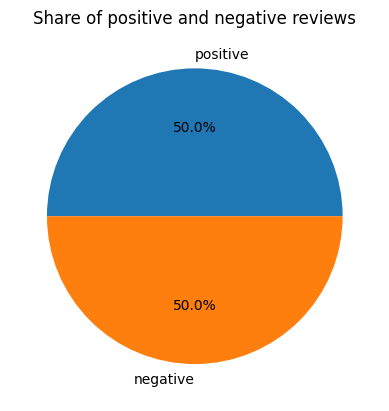

In [7]:

print(pd.DataFrame(data['sentiment'].value_counts()))
plt.pie(x=data['sentiment'].value_counts(), labels=data['sentiment'].value_counts().keys(), autopct='%1.1f%%')
plt.title("Share of positive and negative reviews")
plt.show()

- dataset is balanced with equal number of positive and negative observations

In [8]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
def preprocess_text(text):
    """function that take text input and apply below operation to clean the text.
    1. removing special characters
    2. create token from the text input and get lowercase
    3. remove stopwords as per NLTK stopwords library
    4. using PorterStemmer for stemming the token
    5. combine all tokens back to text
    6. return the processed text"""

    text = re.sub(r'<[^>]+>', ' ', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    stemmed_tokens = [PorterStemmer().stem(token) for token in filtered_tokens]
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text.lower()

data['review'] = data['review'].apply(preprocess_text)

KeyboardInterrupt: ignored

In [13]:
data['sentiment'] = data['sentiment'].map({'negative': 0, 'positive': 1})
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [14]:
X_train,X_test,y_train,y_test=train_test_split(data.review,data.sentiment,test_size=0.5, random_state=42)

# ML model employed
- LogisticRegression
- RandomForestClassifier
- KNeighbourClassifier
- MultinomialNB

In [15]:
result_summary = pd.DataFrame(columns=['Model','Precision','Recall'])
result_summary

,Model,Precision,Recall


In [16]:

def score_model(model,test_predictions, result_summary):
    """Function to get the summary of the predictions obtained.
    prints the accuracy, precision score, recall score, confusion matrix, and classification report."""

    print("\nSummary Report\n")
    accuracy = accuracy_score(y_test, test_predictions)
    print("Accuracy:", accuracy)


    precision = precision_score(y_test, test_predictions)
    recall = recall_score(y_test, test_predictions)
    print("Precision:", precision)
    print("Recall:", recall)


    conf_matrix = confusion_matrix(y_test, test_predictions)
    print("\nConfusion Matrix:")
    print(conf_matrix)


    class_names = ['negative', 'positive']
    classification_rep = classification_report(y_test, test_predictions, target_names=class_names)
    print("\nClassification Report:")
    print(classification_rep)
    print()


    temp_row = pd.DataFrame([{'Model':model,'Precision':precision,'Recall':recall}])
    result_summary=pd.concat([result_summary, temp_row], ignore_index=True)
    return(result_summary)

In [17]:
#Logistic Regression

lr=Pipeline([('vectorizer', CountVectorizer()),('classifier',LogisticRegression())])

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

result_summary = score_model('LogisticRegression',y_pred,result_summary)
print(result_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Summary Report

Accuracy: 0.88576
Precision: 0.8809843047558956
Recall: 0.8923863545578014

Confusion Matrix:
[[10974  1509]
 [ 1347 11170]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.88      0.88     12483
    positive       0.88      0.89      0.89     12517

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000


                Model  Precision    Recall
0  LogisticRegression   0.880984  0.892386


In [18]:
#Random Forest
rfc = Pipeline([('vectorizer', CountVectorizer()),
    ('random_forest', (RandomForestClassifier(n_estimators=75, criterion='entropy')))
])

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

result_summary = score_model('RandomForestClassifier',y_pred, result_summary)
print(result_summary)


Summary Report

Accuracy: 0.84928
Precision: 0.8380864054409151
Recall: 0.8663417751857474

Confusion Matrix:
[[10388  2095]
 [ 1673 10844]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.83      0.85     12483
    positive       0.84      0.87      0.85     12517

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000


                    Model  Precision    Recall
0      LogisticRegression   0.880984  0.892386
1  RandomForestClassifier   0.838086  0.866342


# KNeighboursClassifier

In [19]:
#KNN

knc = Pipeline([
     ('vectorizer', CountVectorizer()),
      ('KNN', (KNeighborsClassifier(n_neighbors=20, metric = 'euclidean')))
])

knc.fit(X_train, y_train)

y_pred = knc.predict(X_test)

result_summary = score_model('KNeighborsClassifier',y_pred,result_summary)
result_summary


Summary Report

Accuracy: 0.66768
Precision: 0.6559004370694126
Recall: 0.7073579931293441

Confusion Matrix:
[[7838 4645]
 [3663 8854]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.63      0.65     12483
    positive       0.66      0.71      0.68     12517

    accuracy                           0.67     25000
   macro avg       0.67      0.67      0.67     25000
weighted avg       0.67      0.67      0.67     25000




,Model,Precision,Recall
0,LogisticRegression,0.880984,0.892386
1,RandomForestClassifier,0.838086,0.866342
2,KNeighborsClassifier,0.655900,0.707358


In [20]:
#MultinomialNB

mnb = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

result_summary = score_model('MultinomialNB',y_pred,result_summary)
result_summary


Summary Report

Accuracy: 0.84752
Precision: 0.8660331343032546
Recall: 0.8227210993049453

Confusion Matrix:
[[10890  1593]
 [ 2219 10298]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.87      0.85     12483
    positive       0.87      0.82      0.84     12517

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000




,Model,Precision,Recall
0,LogisticRegression,0.880984,0.892386
1,RandomForestClassifier,0.838086,0.866342
2,KNeighborsClassifier,0.655900,0.707358
3,MultinomialNB,0.866033,0.822721


In [21]:
#CNN

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten,Conv1D, GlobalMaxPooling1D, Dense, LSTM
from tensorflow.keras.activations import relu, sigmoid


In [22]:


lm = WordNetLemmatizer()
def text_processing(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus


df=data.copy()


In [23]:
train_df, test_df = train_test_split(df, test_size=0.5, random_state=42)

In [24]:
max_words = 1000
max_seq_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['review'])

X_train = tokenizer.texts_to_sequences(train_df['review'])
X_test = tokenizer.texts_to_sequences(test_df['review'])

X_train = pad_sequences(X_train, maxlen=max_seq_length, padding = 'post')
X_test = pad_sequences(X_test, maxlen=max_seq_length, padding='post')

y_train = np.array(train_df['sentiment'])
y_test = np.array(test_df['sentiment'])

In [25]:
embedding_dim = 100

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_seq_length))
model.add(Conv1D(filters=128, kernel_size=5, activation=relu))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation=relu))
model.add(Dense(1, activation=sigmoid))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

epochs = 30
batch_size = 32

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          100000    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 172449 (673.63 KB)
Trainable params: 172449 (673.63 KB)
Non-trainable params: 0 (0.00 Byte)
________________

Test Loss: 1.283424973487854
Test Accuracy: 0.8513200283050537


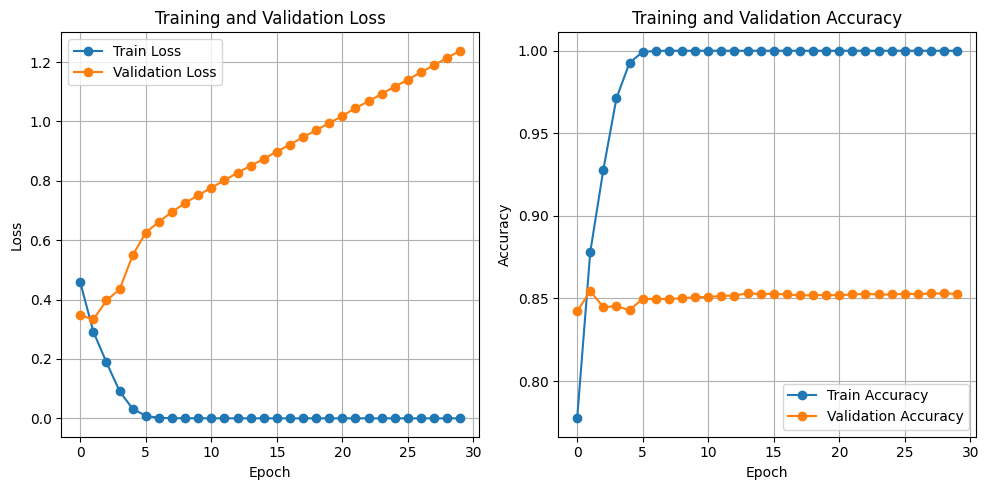

782/782 [==============================] - 9s 11ms/step

Summary Report

Accuracy: 0.85132
Precision: 0.8468390351568659
Recall: 0.8582727490612767

Confusion Matrix:
[[10540  1943]
 [ 1774 10743]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.84      0.85     12483
    positive       0.85      0.86      0.85     12517

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000




In [26]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

test_predictions_probs = model.predict(X_test)
test_predictions = (test_predictions_probs > 0.5).astype(int)

result_summary = score_model('CNN',test_predictions,result_summary)

In [27]:
result_summary

,Model,Precision,Recall
0,LogisticRegression,0.880984,0.892386
1,RandomForestClassifier,0.838086,0.866342
2,KNeighborsClassifier,0.655900,0.707358
3,MultinomialNB,0.866033,0.822721
4,CNN,0.846839,0.858273
